In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

sns.set()
%matplotlib inline

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [ ]:
# Read in the telegraph_articles
news_articles = pd.read_csv('/content/news.csv')

In [ ]:
# Read in the newyorktimes_articles
newyorktimes_articles = pd.read_csv('/content/newyorktimes_articles.csv')

In [ ]:
# Read in the nytimes_articles
foxnews_articles = pd.read_csv('/content/foxnews_articles.csv')

In [ ]:
# Read in the abcnews_articles
abcnews_articles = pd.read_csv('/content/foxnews_articles.csv')

In [ ]:
# Combine articles to one dataframe
articles = pd.concat([news_articles, newyorktimes_articles, foxnews_articles, abcnews_articles])

In [ ]:
articles_copy = articles.copy()

In [ ]:
articles.head(5)

category                                                url  \
0  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   
1  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   
2  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   
3  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   
4  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   

                                             heading  \
0  \n                     Volunteerism, the possi...   
1  \n                     Portugal's Digital Noma...   
2  \n                     Mthuli: The anti-devolu...   
3  \n                     Devotion: The heart of ...   
4  \n                     Youths should be on the...   

                                             article  
0  \n                The passion for climate acti...  
1  \n                Portugal's Digital Nomad Vis...  
2  \n                The inclusive government of ...  
3  \n                In case you missed some of o...  
4  \n                The worst part was to discov...

In [ ]:
# Look at the shape of the data
articles.shape

(293, 4)

### Data Exploration

In [ ]:
# Check for null values
articles.isnull().sum()

category     0
url          0
heading     12
article      5
dtype: int64

#### Since we only need the category and the article, we'll drop all other columns except the two then drop the rows with null values in the remaining two columns

In [ ]:
# Drop unnecessary columns
articles = articles.drop(['heading'], axis=1)
articles_copy = articles_copy.drop(['heading'], axis=1)

# Drop null rows in the remaining rows
articles = articles.dropna()
articles_copy = articles_copy.dropna()

In [ ]:
# Reset the indices of the articles
articles = articles.reset_index(drop=True)

In [ ]:
articles.head()

category                                                url  \
0  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   
1  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   
2  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   
3  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   
4  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   

                                             article  
0  \n                The passion for climate acti...  
1  \n                Portugal's Digital Nomad Vis...  
2  \n                The inclusive government of ...  
3  \n                In case you missed some of o...  
4  \n                The worst part was to discov...

<Axes: xlabel='category'>

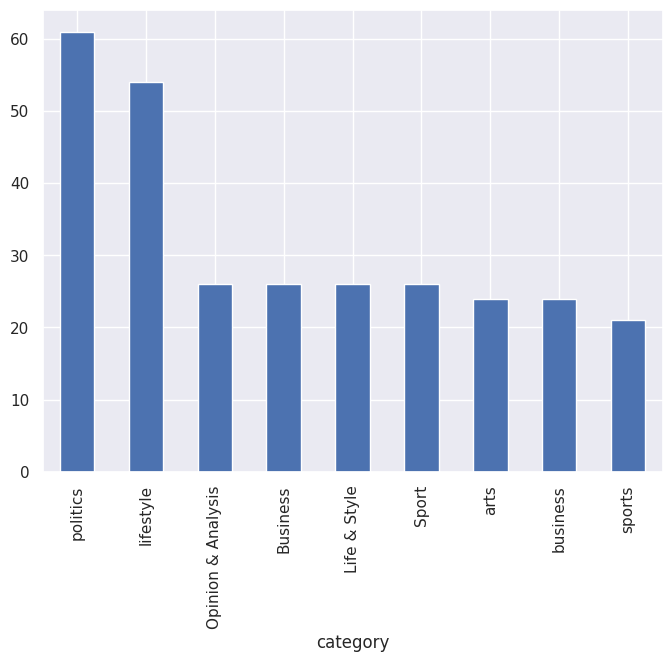

In [ ]:
# Look at the distribution of categories in the articles
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
articles['category'].value_counts().plot(kind='bar', ax=ax)

In [ ]:
# Combine culture, arts, lifestyle and sport and sports
culture_arts_lifestyle = ['culture', 'arts', 'lifestyle']
sports = ['sport', 'sports']

articles['category'] = articles['category'].apply(lambda x: 'culture/arts/lifestyle 'if x in culture_arts_lifestyle else('sports' if x in sports else(x)))

<Axes: xlabel='category'>

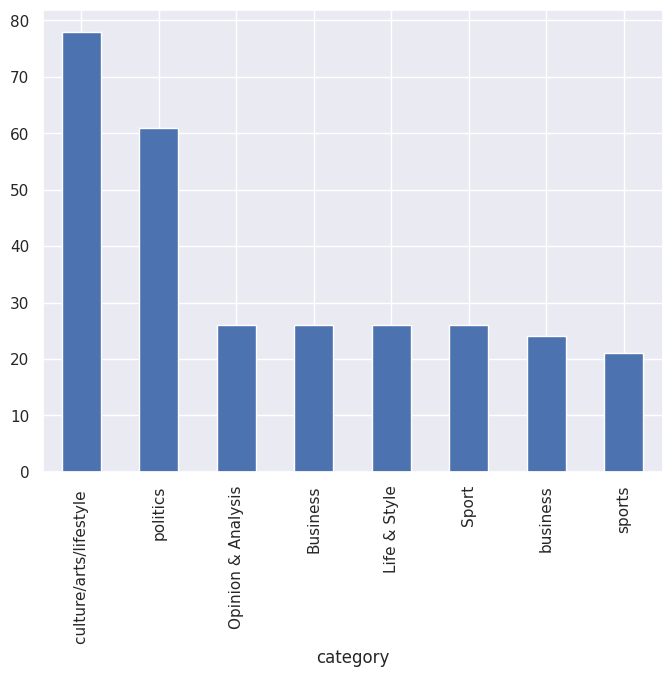

In [ ]:
# Look at the distribution of new categories in the articles
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
articles['category'].value_counts().plot(kind='bar', ax=ax)

### Data Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
STOPWORDS = stopwords.words('english')

In [ ]:
# Dictionary mapping word contractions to their full words
contractions = {
    "ain't": "are not","'s":" is","aren't": "are not",
     "can't": "cannot","can't've": "cannot have",
     "'cause": "because","could've": "could have","couldn't": "could not",
     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
     "hasn't": "has not","haven't": "have not","he'd": "he would",
     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
     "it'd": "it would","it'd've": "it would have","it'll": "it will",
     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
     "mayn't": "may not","might've": "might have","mightn't": "might not",
     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
     "mustn't've": "must not have", "needn't": "need not",
     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
     "she'll": "she will", "she'll've": "she will have","should've": "should have",
     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
     "there'd've": "there would have", "they'd": "they would",
     "they'd've": "they would have","they'll": "they will",
     "they'll've": "they will have", "they're": "they are","they've": "they have",
     "to've": "to have","wasn't": "was not","we'd": "we would",
     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
     "what'll've": "what will have","what're": "what are", "what've": "what have",
     "when've": "when have","where'd": "where did", "where've": "where have",
     "who'll": "who will","who'll've": "who will have","who've": "who have",
     "why've": "why have","will've": "will have","won't": "will not",
     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
     "y'all'd've": "you all would have","y'all're": "you all are",
     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
     "you'll": "you will","you'll've": "you will have", "you're": "you are",
     "you've": "you have"
}

In [ ]:
# Remove punctutation marks, stopwords, emojis, urls, convert to lowercase, expand contractions
def preprocess_article(article):
    res_article = []
    lemmatizer = WordNetLemmatizer()

    for word in article.split():

        # Expand Contractions
        word = contractions.get(word.lower(), word)

        # Remove stopwords
        if word not in STOPWORDS:

            # Remove url
            word = re.sub(r'http\S+', '', word)

            emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
            word = emoji_clean.sub(r'', word)

             # Remove punctuation
            word = re.sub(r'[^\w\s]', '', word)

            # Convert to lowercase
            word = word.lower()

            # Lemmatize the word
            word = lemmatizer.lemmatize(word, pos='v')

            if word != '':
                res_article.append(word)


    return ' '.join([word for word in res_article])

In [ ]:
articles['article'] = articles['article'].apply(lambda x: preprocess_article(x))

In [ ]:
articles.head()

category                                                url  \
0  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   
1  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   
2  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   
3  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   
4  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   

                                             article  
0  the passion climate action justice display div...  
1  portugals digital nomad visa officially know d...  
2  the inclusive government 2009 2013 dispute 200...  
3  in case miss teach new testament prayers basic...  
4  the worst part discover late life things slowl...

### Further Data Exploration

In [ ]:
from nltk.probability import FreqDist

In [ ]:
article_tokens = [word for article in articles['article'] for word in article.split()]
fdist = FreqDist(article_tokens)

<Axes: >

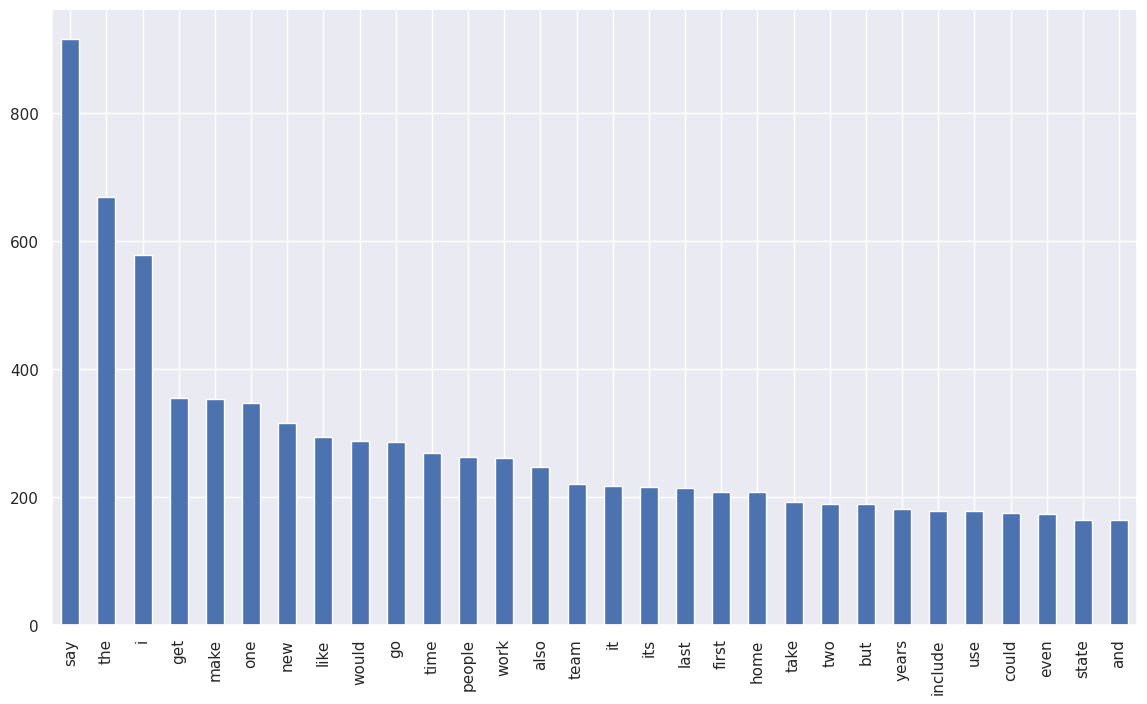

In [ ]:
fig = plt.figure(figsize=(14,8))
ax = fig.gca()

pd.Series(dict(fdist.most_common(30))).plot(kind='bar', ax=ax)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [ ]:
def display_cloud(label):
    plt.subplots(figsize=(13,13))
    text = articles[articles['category']==label]["article"].tolist()
    wc = WordCloud(
      stopwords=STOPWORDS,
      background_color='black',
      colormap='Blues',
      collocations=False,
      width=1800,
      height=800,
    )
    wc.generate(' '.join(text))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.title(label,fontsize=24)
    plt.show()

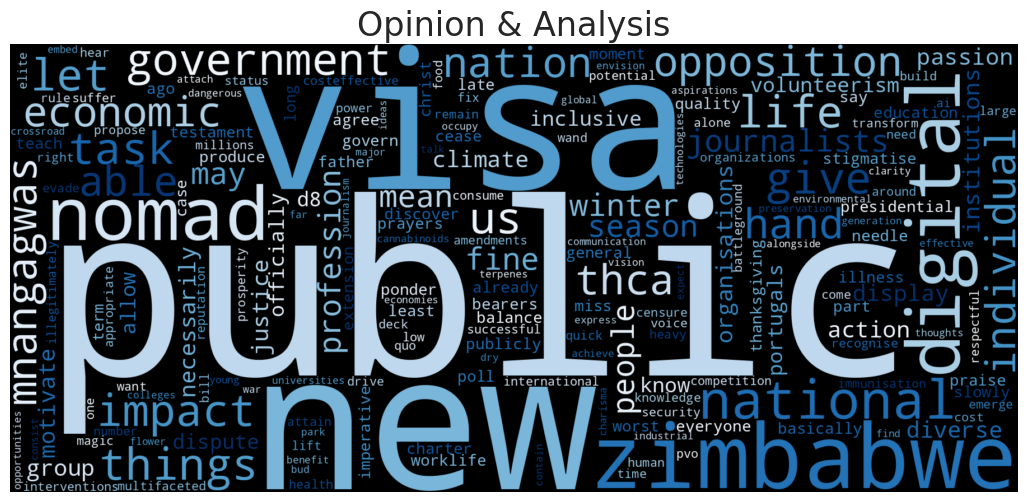

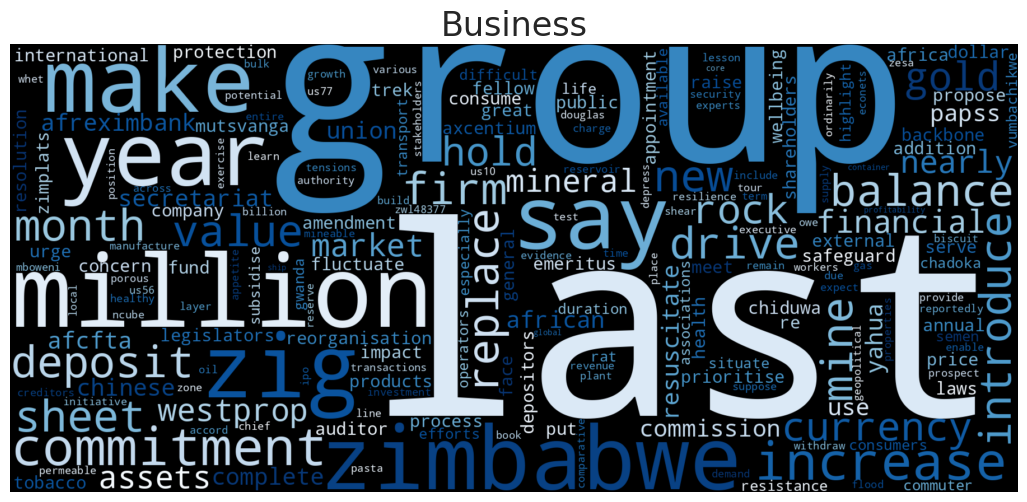

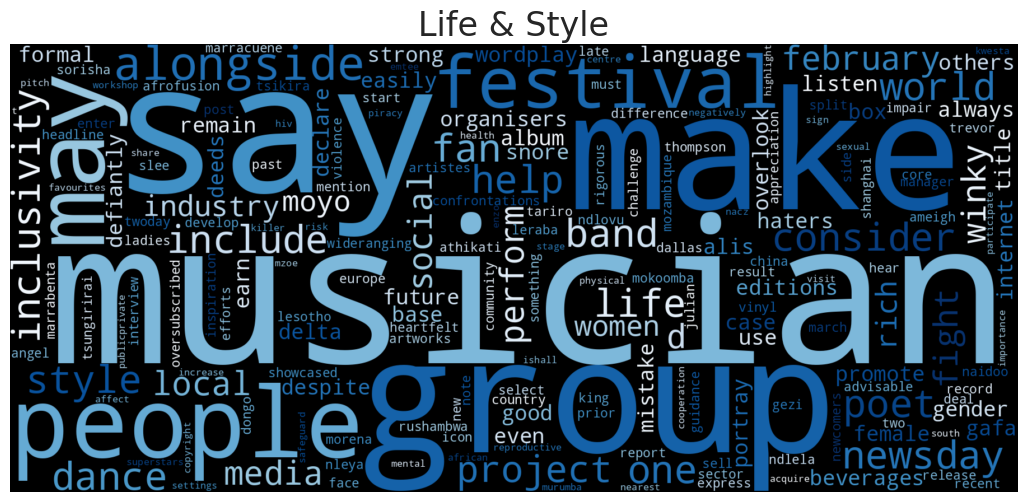

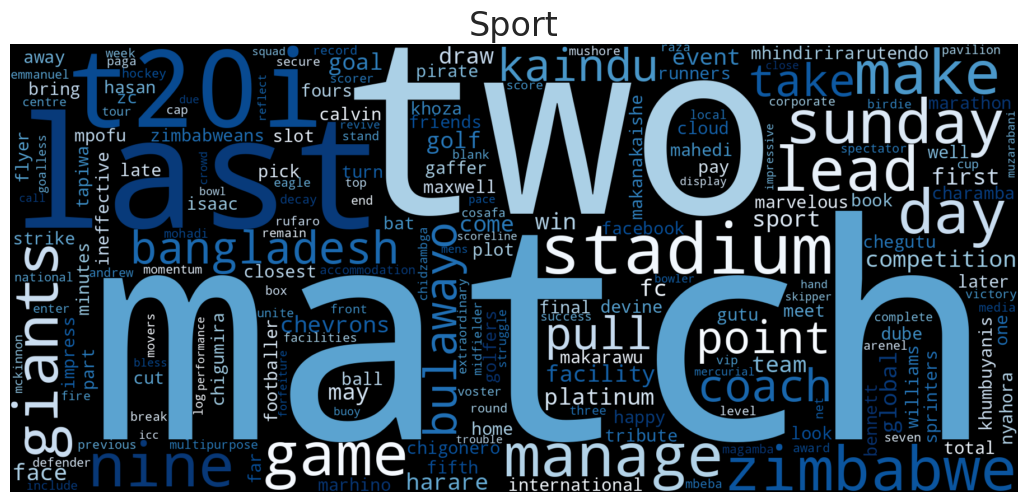

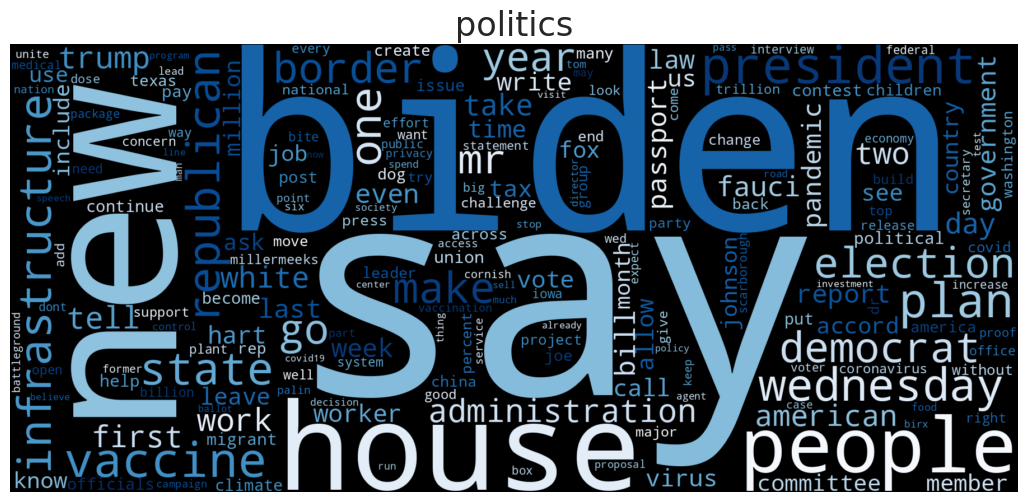

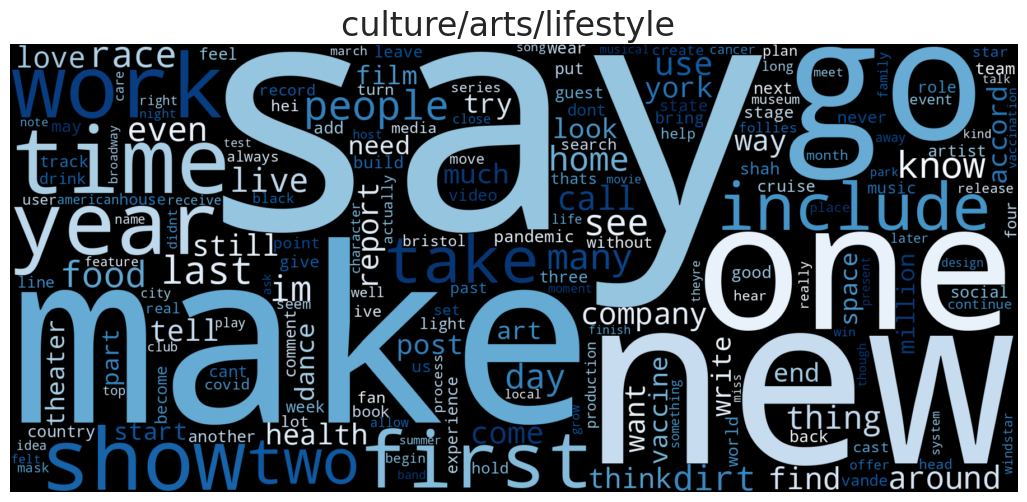

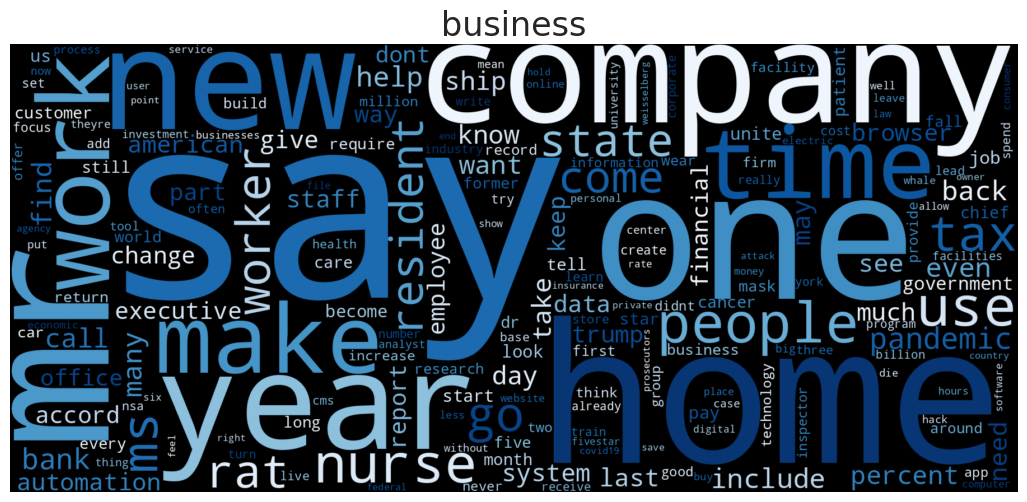

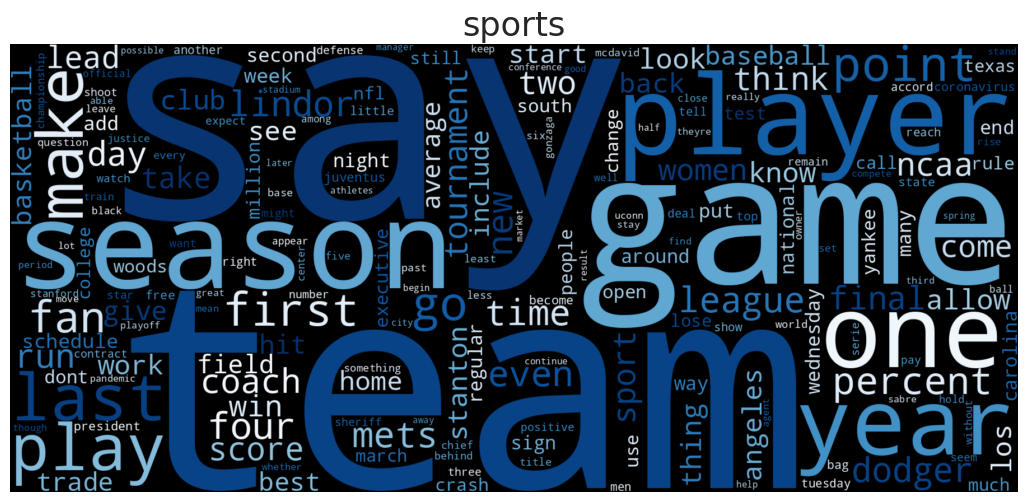

In [ ]:
for category in articles['category'].unique():
    display_cloud(category)

### Feature Engineering

In [ ]:
#TF IDF for article column
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tfidf_article = tfidf_vectorizer.fit_transform(articles['article'])

In [ ]:
pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))

In [ ]:
#tf-idf output vectors
from sklearn.decomposition import PCA

In [ ]:
tfidf_article.toarray().shape

(288, 12959)

In [ ]:
tfidf_pca = PCA(n_components = 2)
tfidf_pca_comp = tfidf_pca.fit_transform(tfidf_article.toarray())

In [ ]:
tfidf_pca_comp.shape

(288, 2)

In [ ]:
pickle.dump(tfidf_pca, open('tfidf_pca.pkl', 'wb'))

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

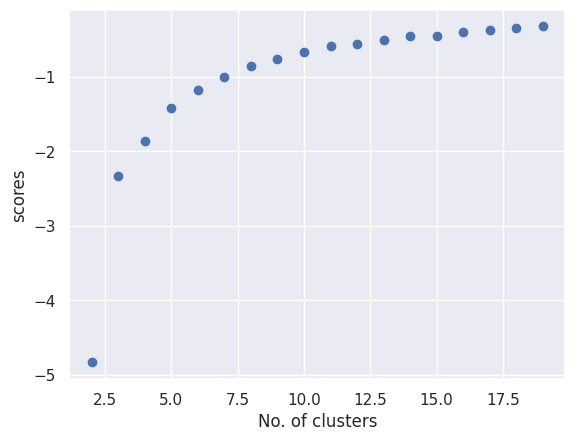

In [ ]:
clusters=[]
kmeans_scores=[]

K = range(2, 20)
for k in K:
    k_means = KMeans(n_clusters=k)
    k_means.fit(tfidf_pca_comp)
    kmeans_scores.append(k_means.score(tfidf_pca_comp))
    clusters.append(k)
plt.scatter(clusters,kmeans_scores)
plt.xlabel("No. of clusters")
plt.ylabel("scores")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


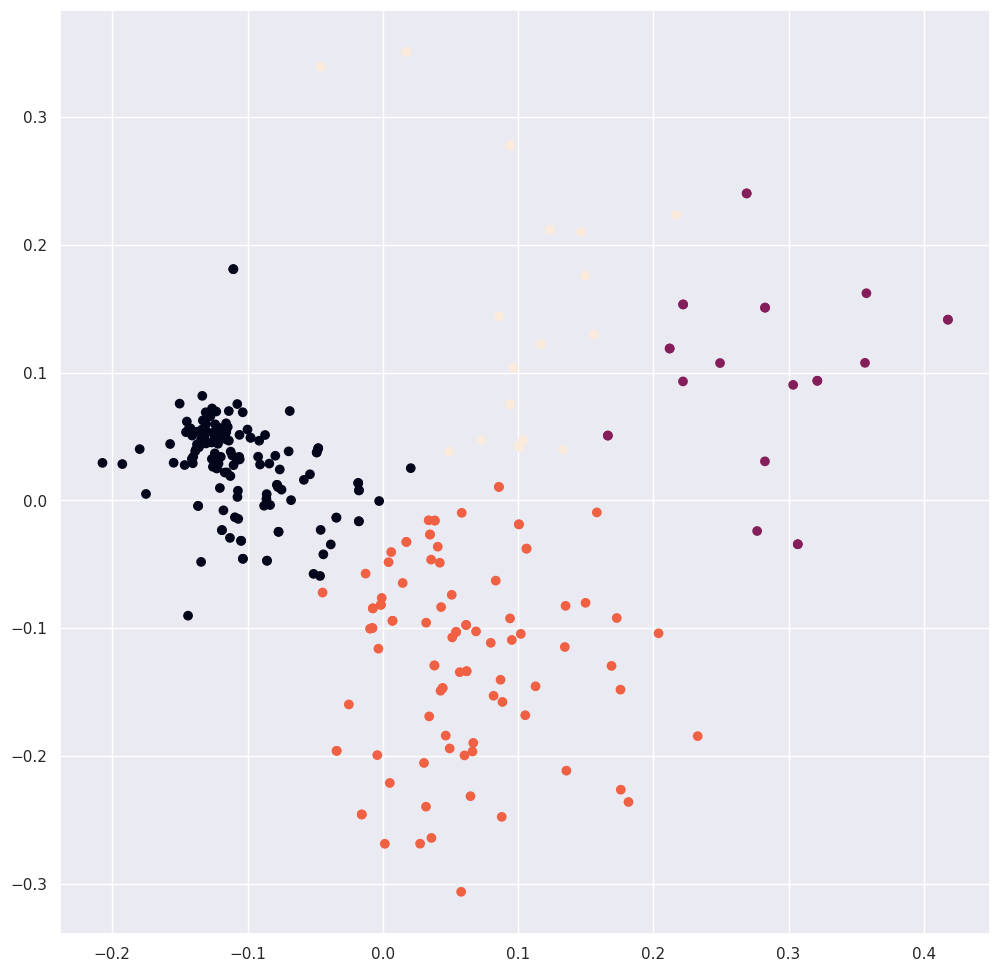

In [ ]:
k_means = KMeans(n_clusters=4)
k_means.fit(tfidf_pca_comp)
pred=k_means.predict(tfidf_pca_comp)
plt.figure(figsize=(12,12))
plt.scatter(tfidf_pca_comp[:,0],tfidf_pca_comp[:,1],c=pred)
# sns.scatterplot(x=tfidf_pca_comp[:,0], y=tfidf_pca_comp[:,0], hue=pred)
plt.show()

In [ ]:
import pickle

In [ ]:
# Save the kmeans model for deployment
pickle.dump( k_means, open('kmeans_model.pkl', 'wb'))

In [ ]:
articles['clusters'] = pred
articles_copy['clusters'] = pred

articles.head()

category                                                url  \
0  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   
1  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   
2  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   
3  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   
4  Opinion & Analysis  https://www.newsday.co.zw/opinion-analysis/art...   

                                             article  clusters  
0  the passion climate action justice display div...         0  
1  portugals digital nomad visa officially know d...         0  
2  the inclusive government 2009 2013 dispute 200...         0  
3  in case miss teach new testament prayers basic...         0  
4  the worst part discover late life things slowl...         0

In [ ]:
articles['clusters'].unique()

array([0, 1, 2, 3], dtype=int32)

In [ ]:
articles_copy.to_csv('clustered_articles.csv', index=False)